In [126]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import random

In [127]:
class ChargedParticle:
    def __init__(self, mass, charge, postion, velocity):
        self.m = mass
        self.q = charge
        self.r = np.array(postion)
        self.v = np.array(velocity)
        
    def RW_field(self, E, t, w):
        return(np.array([E*math.cos(w*t), E*math.sin(w*t), 0]))
    
    def PE_field(self, other_particles, E_factor=1, C_factor=0.1, RW_args=None):
        external=np.array([2*self.r[0], 2*self.r[1], -4*self.r[2]])
        RW=0
        if(RW_args):
            RW=self.RW_field(RW_args[0], RW_args[1], RW_args[2])
        coulomb=0
        for i in other_particles:
            coulomb += C_factor*np.array((self.r-i.r)/np.linalg.norm(self.r-i.r)**3)
        return(np.array(external)+np.array(coulomb)+np.array(RW))
        
    def v_r_step(self, dt, E, B):
        # Boris Algorithm
        v_minus = (dt*self.q*E)/(2*self.m) + self.v
        c = (dt*self.q)/(2*self.m)
        
        #solve for v_plus through system of linear equations
        a = np.array([[1, -c*B[2], c*B[1]],[c*B[2], 1, -c*B[0]], [-c*B[1], c*B[0], 1]])
        b = c * np.cross(v_minus, B) + v_minus
        v_plus =np.linalg.solve(a, b)
        
        v_new = v_plus + (dt*self.q*E)/(2*self.m)
        # END OF METHOD SIMILAR TO YOURS
        
        # below is a second version of the Boris Alg i worked out using matrix idenities?
        # does it work? Kind of.       
#         v_new=[]
#         Omega = (self.q*B)/self.m
#         Sigma = (self.q*E)/self.m
#         A = np.array((Omega*dt)/2)
#         C = np.array(self.v + dt*(Sigma + np.cross(self.v, Omega/2)))
#         v_new=(C + A*np.dot(A, C) - np.cross(A, C))/(1+np.dot(A, A))

        #Step and replace position and velocity
        r_new = self.r + v_new*dt
        self.v = np.array(v_new)
        self.r = np.array(r_new)


In [128]:
## Initialise particle properties
particles=[]
num_particles=3
q = 1
m = 1

#Initialise B field
B=np.array([0, 0, 5])

#create particle array
for i in range(0, num_particles):
    particles.append(ChargedParticle(m, q, [1-2*i, 1, 1], [0.001,0, 0]))
particles=np.array(particles)

In [123]:
#iterate through steps0
T=0
V=[]
R=[]
dt=.005
time=[]

#print(x_old[1][0])
while T<14:
    time.append(T)
    r=[]
    v=[]
    for p in range(0, len(particles)):
        other_particles=np.delete(particles, p)
        rw_args=[200, T, 5000]
        E = particles[p].PE_field(other_particles, E_factor=1, C_factor=0.1, RW_args=rw_args)
        particles[p].v_r_step(dt, E, B)
        
        r.append(particles[p].r)
        v.append(particles[p].v)
    
    R.append(r)
    V.append(v)
    T=T+dt


In [124]:
R=np.transpose(np.array(R))
V=np.transpose(np.array(V))
#for i in range(0, num_particles):
    #print(R[0][i])

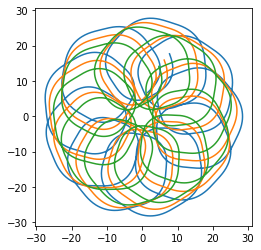

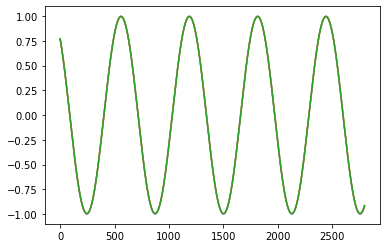

In [125]:
for i in range(0, num_particles):
    plt.plot(R[0][i], R[1][i]) 
plt.gca().set_aspect('equal')
plt.show()

for i in range(0, num_particles):
    plt.plot(R[2][i]) 

In [35]:
print(R[0])

[[ 1.00001125  1.00002874  1.00005245  1.00008238  1.00011851  1.00016081
   1.00020925  1.00026381  1.00032445  1.00039113  1.00046381  1.00054244
   1.00062697  1.00071735  1.00081353  1.00091543  1.001023    1.00113616
   1.00125485  1.00137899  1.00150849  1.00164329  1.00178328  1.00192839
   1.00207851  1.00223356  1.00239344  1.00255803  1.00272725  1.00290097
   1.0030791   1.00326151  1.00344809  1.00363872  1.00383328  1.00403164
   1.00423369  1.00443928  1.00464829  1.00486058  1.00507602  1.00529448
   1.00551581  1.00573987  1.00596651  1.0061956   1.00642699  1.00666052
   1.00689606  1.00713344  1.00737252  1.00761315  1.00785516  1.00809842
   1.00834275  1.00858801  1.00883404  1.00908067  1.00932776  1.00957514
   1.00982266  1.01007016  1.01031747  1.01056445  1.01081092  1.01105674
   1.01130175  1.01154579  1.0117887   1.01203032  1.01227051  1.01250911
   1.01274595  1.01298091  1.01321381  1.01344451  1.01367287  1.01389873
   1.01412195  1.01434239  1.0145599  

[1.0001097  1.00031801 1.00062284 ... 0.54223066 0.54047957 0.53877714] [-5.98503741e-06 -2.78709709e-05 -7.54165338e-05 ... -8.59069048e-01
 -8.59158803e-01 -8.59160537e-01]
[-1.0000898  -1.00027851 -1.00056423 ... -0.54177224 -0.53998697
 -0.53825109] [3.99032343e-06 2.19075192e-05 6.35511876e-05 ... 8.58980314e-01
 8.59063857e-01 8.59056034e-01]


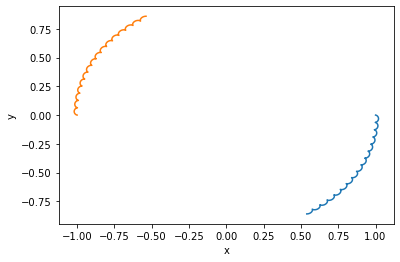

Text(0, 0.5, 'z')

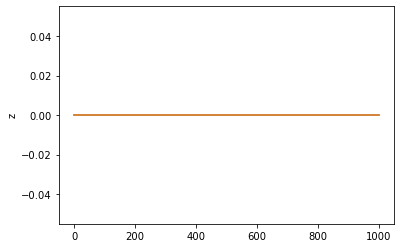

In [71]:
for i in range(0, num_particles):
    plt.plot(R[0][i], R[1][i]) 
    print(R[0][i], R[1][i])
#plt.gca().set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

for i in range(0, num_particles):
    plt.plot(R[2][i]) 
plt.ylabel('z')


In [160]:
# ANIMATION FUNCTION
def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])
    line.set_3d_properties(dataSet[2, :num])
    return line

dataSet = np.array([r[0][i], r[1][i], time])

x, y, z = dataSet[0], dataSet[1], dataSet[2]
numDataPoints = len(r[2][i])
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure()
ax = Axes3D(fig)
# NOTE: Can't pass empty arrays into 3d version of plot()
for i in range(0, num_particles): 
    line = plt.plot(r[0][i], time,  r[1][i], lw=2)[0] 
 #= plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')# For line plot
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('time')
# Creating the Animation object
#line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line), interval=0, blit=False)
#line_ani.save(r'AnimationNew.mp4')

<ipython-input-160-84ad7418c37e>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataSet = np.array([r[0][i], r[1][i], time])


IndexError: list index out of range